# Bài tập 1: Phân cụm K-Means trên dữ liệu Penguins
Dataset: https://www.kaggle.com/code/youssefaboelwafa/clustering-penguins-species-k-means-clustering

## 1. Import thư viện và load dữ liệu

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load dữ liệu
df = pd.read_csv('penguins.csv')
print("Thông tin dữ liệu:")
df.info()
print("\nMẫu dữ liệu:")
df.head()

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB

Mẫu dữ liệu:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


## 2. Khám phá và xử lý dữ liệu

In [16]:
# Kiểm tra giá trị null
print("Giá trị null trong dữ liệu:")
print(df.isnull().sum())

# Loại bỏ các dòng có giá trị null
df = df.dropna()

# Thống kê mô tả
print("\nThống kê mô tả:")
df.describe()

Giá trị null trong dữ liệu:
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Thống kê mô tả:


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


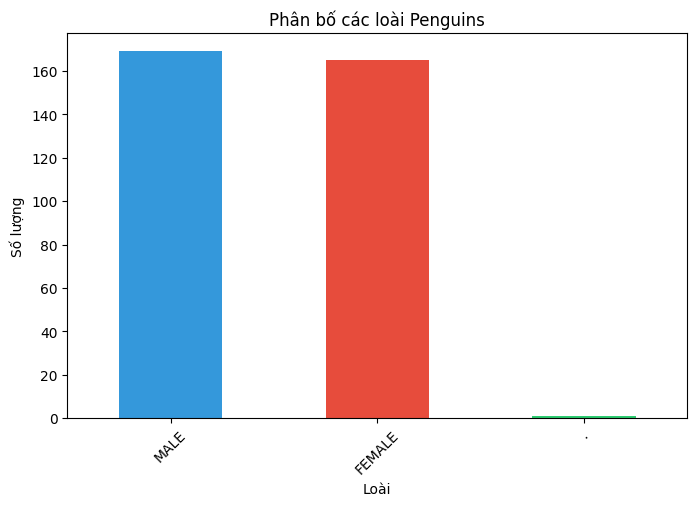

In [17]:
# Visualize phân bố theo giới tính
plt.figure(figsize=(8, 5))
df['sex'].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c', '#2ecc71'])
plt.title('Phân bố các loài Penguins')
plt.xlabel('Loài')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.show()

## 3. Chuẩn bị dữ liệu cho phân cụm

In [18]:
# Chọn các đặc trưng số để phân cụm
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features].values

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Shape của dữ liệu: {X_scaled.shape}")

Shape của dữ liệu: (335, 4)


## 4. Tìm số cụm tối ưu - Phương pháp Elbow

K=2, Inertia=808.12
K=3, Inertia=473.60
K=4, Inertia=303.65
K=5, Inertia=238.45
K=6, Inertia=178.20
K=7, Inertia=152.29
K=8, Inertia=137.83
K=9, Inertia=125.45


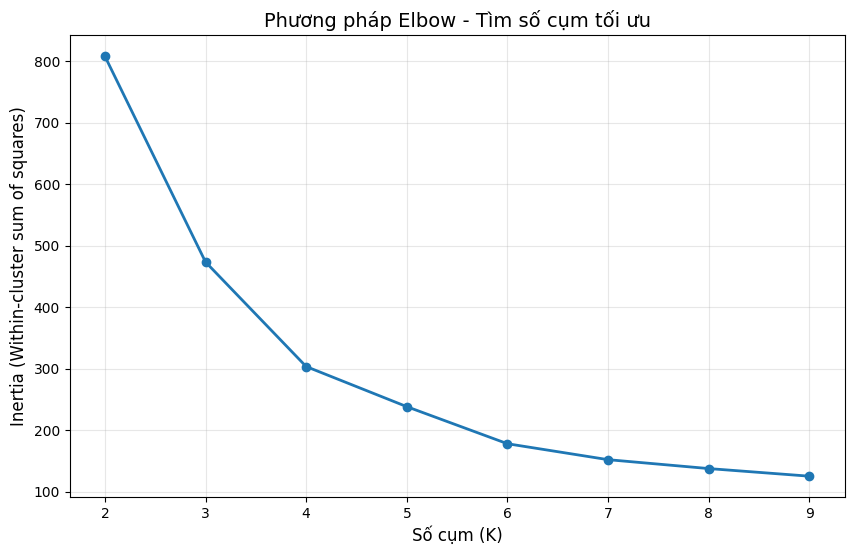

In [19]:
# Tính Inertia cho các giá trị k khác nhau
inertias = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    print(f"K={k}, Inertia={kmeans.inertia_:.2f}")

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linestyle='-', linewidth=2)
plt.title('Phương pháp Elbow - Tìm số cụm tối ưu', fontsize=14)
plt.xlabel('Số cụm (K)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

## 5. Tìm số cụm tối ưu - Silhouette Score

K=2, Silhouette Score=0.4830
K=3, Silhouette Score=0.4963
K=4, Silhouette Score=0.4753
K=5, Silhouette Score=0.4406
K=6, Silhouette Score=0.4035
K=7, Silhouette Score=0.3939
K=8, Silhouette Score=0.3802
K=9, Silhouette Score=0.3391


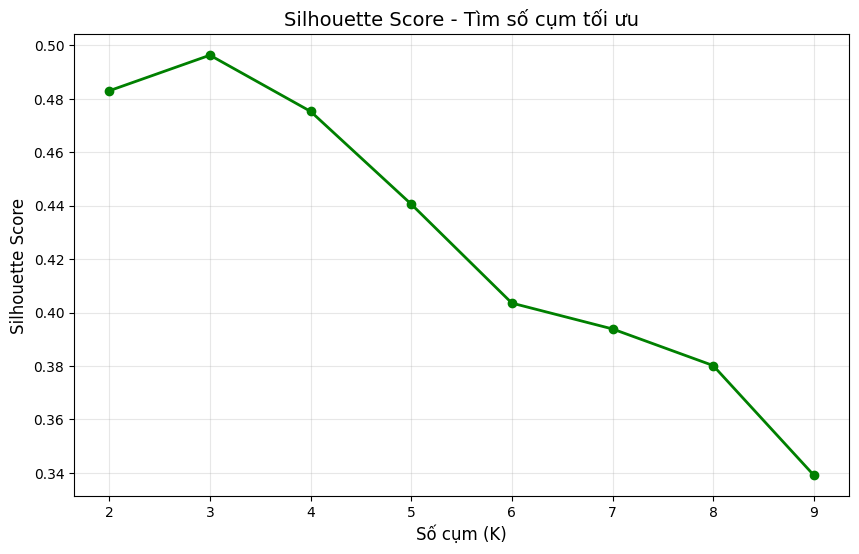


Số cụm tối ưu: K = 3


In [20]:
# Tính Silhouette Score cho các giá trị k khác nhau
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.4f}")

# Vẽ biểu đồ Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', linewidth=2, color='green')
plt.title('Silhouette Score - Tìm số cụm tối ưu', fontsize=14)
plt.xlabel('Số cụm (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# Tìm k tối ưu
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"\nSố cụm tối ưu: K = {optimal_k}")

## 6. Xây dựng mô hình K-Means với K tối ưu

In [21]:
# Xây dựng mô hình với K tối ưu (thường là 3 cho dữ liệu penguins)
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Gán nhãn cụm vào dataframe
df['Cluster'] = clusters

print(f"Silhouette Score của mô hình cuối: {silhouette_score(X_scaled, clusters):.4f}")
print(f"\nSố lượng mẫu trong mỗi cụm:")
print(df['Cluster'].value_counts().sort_index())

Silhouette Score của mô hình cuối: 0.4963

Số lượng mẫu trong mỗi cụm:
Cluster
0    213
1    121
2      1
Name: count, dtype: int64


## 7. Trực quan hóa kết quả phân cụm

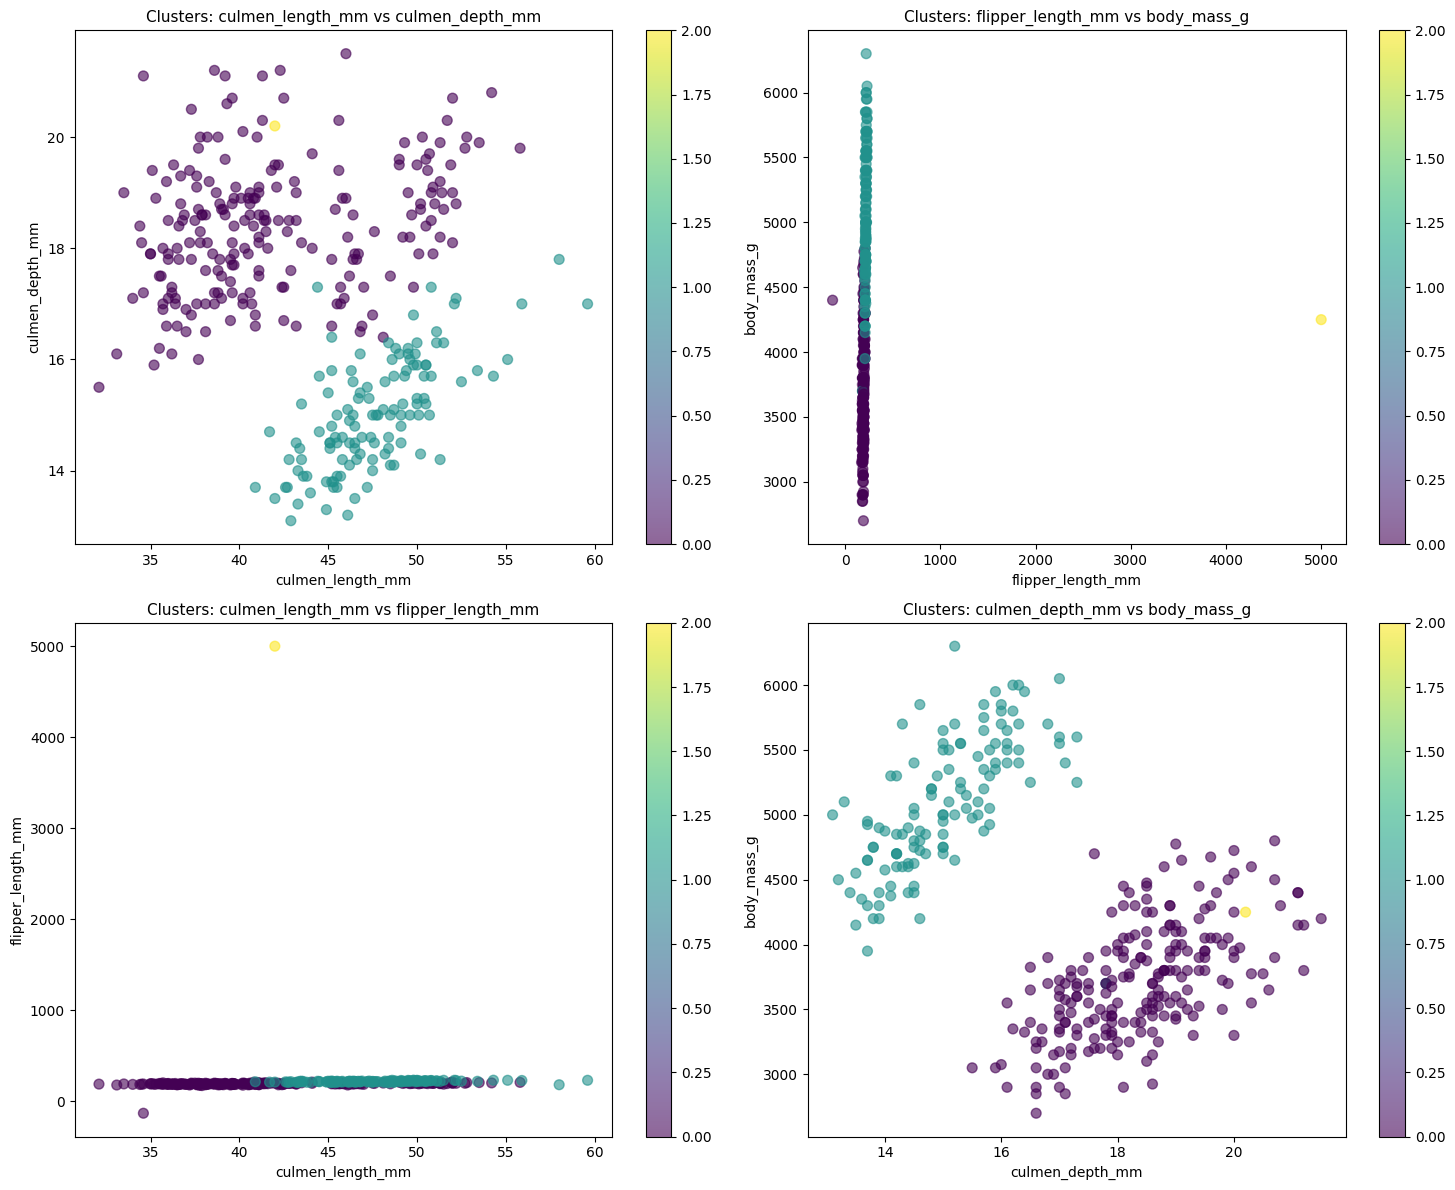

In [22]:
# Visualize theo 2 features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
feature_pairs = [
    ('culmen_length_mm', 'culmen_depth_mm'),
    ('flipper_length_mm', 'body_mass_g'),
    ('culmen_length_mm', 'flipper_length_mm'),
    ('culmen_depth_mm', 'body_mass_g')
]

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx // 2, idx % 2]
    scatter = ax.scatter(df[feat1], df[feat2], c=df['Cluster'], 
                        cmap='viridis', s=50, alpha=0.6)
    ax.set_xlabel(feat1, fontsize=10)
    ax.set_ylabel(feat2, fontsize=10)
    ax.set_title(f'Clusters: {feat1} vs {feat2}', fontsize=11)
    plt.colorbar(scatter, ax=ax)

plt.tight_layout()
plt.show()

## 8. Phân tích đặc điểm của các cụm

In [23]:
# Thống kê đặc điểm của từng cụm
for cluster_id in range(optimal_k):
    print(f"\n{'='*50}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*50}")
    cluster_data = df[df['Cluster'] == cluster_id][features]
    print(cluster_data.describe())
    
    # Phân bố loài trong cụm (nếu có cột species)
    if 'species' in df.columns:
        print(f"\nPhân bố loài trong Cluster {cluster_id}:")
        print(df[df['Cluster'] == cluster_id]['species'].value_counts())


CLUSTER 0
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        213.000000       213.000000         213.000000   213.000000
mean          41.929577        18.373239         190.422535  3714.788732
std            5.393219         1.193294          23.329467   436.692195
min           32.100000        15.500000        -132.000000  2700.000000
25%           37.800000        17.500000         187.000000  3400.000000
50%           40.600000        18.400000         191.000000  3700.000000
75%           46.000000        19.100000         196.000000  4000.000000
max           55.800000        21.500000         212.000000  4800.000000

CLUSTER 1
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        121.000000       121.000000         121.000000   121.000000
mean          47.628926        15.025620         216.933884  5079.132231
std            3.235543         1.012302           7.314068   513.478204
min           40.900000      

## 9. So sánh với nhãn thực tế (nếu có)

In [24]:
if 'species' in df.columns:
    # So sánh cluster vs species thực tế
    comparison = pd.crosstab(df['Cluster'], df['species'])
    print("Bảng so sánh Cluster vs Species thực tế:")
    print(comparison)
    
    # Visualize
    plt.figure(figsize=(10, 6))
    comparison.plot(kind='bar', stacked=False, colormap='Set2')
    plt.title('So sánh Clusters với Species thực tế')
    plt.xlabel('Cluster')
    plt.ylabel('Số lượng')
    plt.legend(title='Species')
    plt.xticks(rotation=0)
    plt.show()